<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
import numpy as np

In [3]:
# Command(s)
np.sum(1*auto.isnull())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [4]:
# Command:
auto.loc[auto["horsepower"].isnull()]
# Comment (One - two sentence)
# 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [5]:
# Command(s):
#np.median(auto.loc[auto["horsepower"].isnull() == False])
#auto["horsepower"] = 
auto.fillna(np.median(auto.loc[auto["horsepower"].isnull() == False])).head()
# Comment (one sentence):
# 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [6]:
auto["horsepower"] = auto["horsepower"].fillna(np.median(auto.loc[auto["horsepower"].isnull() == False]))

In [7]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [8]:
from scipy import stats
import statsmodels.api as sm

C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
# Develop the model 
feature_names = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
features = auto[feature_names]
target = auto["mpg"]

model = sm.OLS(target, features).fit()
model.summary()

# Comment on its quality 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2973.
Date:                Sun, 04 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:47:04   Log-Likelihood:                -1044.6
No. Observations:                 397   AIC:                             2103.
Df Residuals:                     390   BIC:                             2131.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6847      0.323     -2.120      0.035      -1.320      -0.050
displacement     0.0219      0.008      2.868      0.004       0.007       0.037
horsepower      -0.0373      0.012     -3.084      0.002      -0.061      -0.014
weight          -0.0062      0.001     -9.586      0.000      -0.007      -0.005
acceleration    -0.0701      0.089     -0.792      0.429      -0.244       0.104
year             0.5824      0.024     24.518      0.000       0.536       0.629
origin           1.3222      0.281      4.704      0.000       0.770       1.875
==============================================================================
Omnibus:                       45.795   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.388
Skew:                           0.672   Prob(JB):                     2.87e-19
Kurtosis:                       4.832   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import matplotlib.pyplot as plt

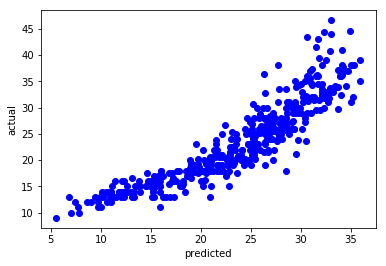

In [11]:
plt.scatter(model.fittedvalues,auto["mpg"], c="blue")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

In [12]:
#from scipy.stats import boxcox, boxcox_normplot
from sklearn.preprocessing import PowerTransformer

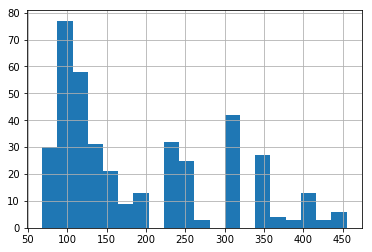

In [70]:
# Histogram of engine displacement
auto["displacement"].hist(bins=20)
plt.show()

# Plot histogram of this new feature to reveal normal-like distribution


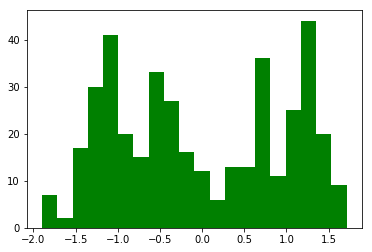

In [71]:
rescaled_values = auto["displacement"].values.reshape(-1,1)
pt = PowerTransformer(method="box-cox")
transformed_values = pt.fit_transform(rescaled_values)
#transformed_values = pt.(rescaled_values)
plt.hist(transformed_values, bins=20, color="green")
plt.show()

<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [84]:
np.setdiff1d(feature_names, ["displacement"]).flatten()

array(['acceleration', 'cylinders', 'horsepower', 'origin', 'weight',
       'year'],
      dtype='<U12')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2998.
Date:                Sun, 04 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:11:47   Log-Likelihood:                -1042.9
No. Observations:                 397   AIC:                             2100.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
cylinders              0.4148      0

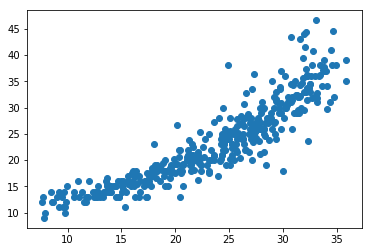

In [88]:
# Calculate then new model
features_m2 = auto[feature_names].drop("displacement",axis=1)
features_m2["displacement_trans"] = transformed_values
#features_m2 = pd.DataFrame(features_m2)
#features_m2["displacement_trans"].shape

model_m2 = sm.OLS(target, features_m2).fit()
print(model_m2.summary())

plt.scatter(model_m2.fittedvalues,target)
#model_m2.fittedvalues
plt.show()

# Comment on its performance
#

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [94]:
features_m2.describe()

,cylinders,horsepower,weight,acceleration,year,origin,displacement_trans
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,3.970000e+02
mean,5.458438,103.732997,2970.261965,15.555668,75.994962,1.574307,1.348767e-15
std,1.701577,38.800568,847.904119,2.749995,3.690005,0.802549,1.001262e+00
min,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,-1.896361e+00
25%,4.000000,75.000000,2223.000000,13.800000,73.000000,1.000000,-8.986998e-01
50%,4.000000,92.000000,2800.000000,15.500000,76.000000,1.000000,-1.901475e-01
75%,8.000000,125.000000,3609.000000,17.100000,79.000000,2.000000,8.713647e-01
max,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.713476e+00


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [95]:
from sklearn.preprocessing import StandardScaler

C:\Users\Joe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Joe\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.4
Date:                Sun, 04 Nov 2018   Prob (F-statistic):          6.52e-142
Time:                        18:22:42   Log-Likelihood:                -220.67
No. Observations:                 397   AIC:                             455.3
Df Residuals:                     390   BIC:                             483.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1009      0.070     -1.441   

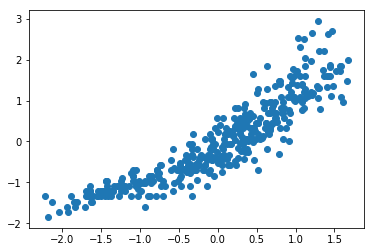

In [105]:
ss = StandardScaler()
auto_ss = ss.fit_transform(auto)
auto_ss = pd.DataFrame(auto_ss, columns=auto.columns)

feature_ss = auto_ss[feature_names]
target_ss = auto_ss["mpg"]

model_ss = sm.OLS(target_ss, feature_ss).fit()
print(model_ss.summary())

plt.scatter(model_ss.fittedvalues,target_ss)
plt.show()

# Recalculate the model

# Comment on its performance
